<!-- PELICAN_BEGIN_SUMMARY -->

In solids, atoms vibrate about their equilibrium positions. At higher temperatures atomic motion increases, but not alyways in the way we expect. For instance, the figure below shows iso-probability contours for atoms in the unit cell of a [perovskite](https://en.wikipedia.org/wiki/Perovskite) crystal with chemical formula CsSnBr$_3$ at 300 degrees Kelvin (about 80 degrees Farenheit). The thermal ellipsoids pictured below enclose 95% of the probability density of atomic motion.

In this post we'll explore atomic displacement distributions in the harmonic approximation, and figure out how to calculate the iso-contours of the distribution.



  
<img src="http://jbechtel.github.io/images/adps_cryst-01.png" alt='[img: adps]'>


<!-- PELICAN_END_SUMMARY -->

## Harmonic Approximation and Gaussian Probabilitiy Distribution

In solids, it is usually reasonable to assume that each atom resides in a more-or-less harmonic potential energy landscape with respect to its displacement, $\mathbf{x}$, from its equilibrium position, $\mathbf{r}_0$. In 1 dimension a harmonic energy surface means that the energy increases with the square of the displacement: $E \sim x^2$. For a 3 dimensional displacement, $\mathbf{x}$, this takes the form:

$$ E = E_0 + \frac{1}{2}\mathbf{x}^{\top}\mathbf{\Phi}\mathbf{x} $$ 

where $\mathbf{\Phi}$ represents a positive definite matrix of second derivatives (the Hessian). 

Then we can imagine that the solid is in thermal equilibrium with its surroundings at temperature, $T$. This scenario is known as the canonical ensemble, and the probability of a displacement $\mathbf{x}$, is given by:

$$ p(\mathbf{x}) = \frac{1}{\mathcal{Z}} \text{exp}(-\beta E) $$

where $\beta = 1/kT$ and $\mathcal{Z}$ is a normalizing constant known as the partition function. Plugging $E$ into this expression we find that $\mathbf{x}$ is normally distributed: 

$$ p(\mathbf{x}) = A \text{exp}(-\frac{1}{2} \mathbf{x}^{\top}\tilde{\mathbf{\Phi}}\mathbf{x} ) $$
where the $E_0$ and $\mathcal{Z}$ are rolled into $A$, and $\tilde{\mathbf{\Phi}}=\mathbf{\Phi}/kT$. Thus $\mathbf{x}$ belongs to a multivariate normal distribution $\mathcal{N}(\mathbf{0},\mathbf{\Sigma})$ of mean zero and with covariance $\mathbf{\Sigma} = \tilde{\mathbf{\Phi}}^{-1}$.

Now how do we go about visualizing the distribution of the atomic displacements? A 1D portrayal of the parabolic energy landscape and resulting Gaussian atomic probability distribution is plotted below. 

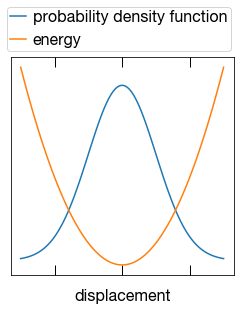

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab

# set aspect_ratio to 1
def square_axis(ax):
    ax.set_aspect((ax.get_xlim()[1]-ax.get_xlim()[0])
                  /(ax.get_ylim()[1]-ax.get_ylim()[0]))
                  

def plot_parabola_and_gaussian_1D(ax,mu,variance,amplitude,offset):
    sigma = np.sqrt(variance)
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    ax.plot(x,0.1+10*mlab.normpdf(x, mu, sigma),
            label='probability density function')
    ax.plot(x,0.5*x**2/sigma**2,
            label='energy')
    ax.legend(bbox_to_anchor=(1.05, 1.3))
    ax.set_xlabel('displacement')
    ax.set_xticklabels([])
    ax.set_yticks([])
    

fig, ax = plt.subplots(1,1,figsize=(4,4))
plot_parabola_and_gaussian_1D(ax,0,1,10,0.1)
plt.show()

Given the parabolic energy surface, the atom is most likely to be found near the equilibrium (lowest energy) position.

## Estimating the Covariance Matrix

Since we are assuming a harmonic energy landscape, and, therefore a normal distribution for atomic motion, we can fully determine the parameters of the normal distribution through estimation of the covariance matrix
$$\mathbf{\Sigma}_{ij}(T) = \langle x_i (T) x_j (T) \rangle$$ at a certain temperature, $T$. The angled brackets $\langle \cdot \rangle$ denote a thermal average, which is thermodynamically defined as the sum over all microstates of the variable of interest _weighted by_ the Boltzmann factor, the whole thing normalized by the partition function:

$$ \langle x_i x_j \rangle = \frac{1}{\mathcal{Z}} {\int_{\mathbf{R}}x_i x_j \text{exp}({-\beta E(\mathbf{R})}})$$

where $\mathcal{Z}$ is the [partition function](https://en.wikipedia.org/wiki/Partition_function_(statistical_mechanics)), $\mathbf{R}$ denotes a particular configuration of the solid (i.e. a snapshot of the whole system), $E(\mathbf{R})$ is the energy of that configuration, and $\beta=1/kT$. The integral we need to calculate is the high dimensional integral over every possible position of every atom. Which means it is generally infeasible to calculate analytically since $E(\mathbf{R})$ couples all of the different degrees of freedom $x_i$. 

We do know, however, that only a relatively few microstates near the equilibrium (i.e. lowest energy) configuration will make  any meaningful contribution to the sum (since the boltzmann factor decays exponentially with energy). Hence, we can cleverly sample the microstates according to the probability that they would occur at equilibrium using the [metropolis algorithm](https://en.wikipedia.org/wiki/Metropolis%E2%80%93Hastings_algorithm) for instance. Then we just take the average value of our variable of interest over a finite number of samples:

$$ \langle x_i x_j \rangle \approx \frac{1}{n} \sum_n x_i x_j $$

More samples improves the statistical accuracy of the average since we gain a better description of the probability distribution from which we are sampling. 

## Visualizing the distribution

Now how do we visualize the 3D normal distribution? In the crystallographic community is it typical to represent the atomic distribution as a constant probabiltiy contour plot. The isocontours of the Gaussian are given by 


$$ \mathbf{x}^{\top}\mathbf{\Sigma}^{-1} \mathbf{x} = \text{constant} $$

which gives the equation of an arbitrarily oriented ellispoid in three dimensions or an ellipse in two dimensions as illstrated below.

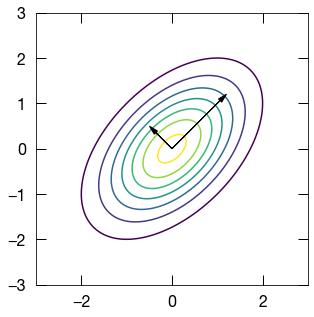

In [3]:
# Let's construct a toy example in 2D to illustrate the concepts
import numpy as np
from matplotlib import pylab as plt
from scipy.stats import multivariate_normal



# contour and eigenvectors of 2D Gaussian
def plot_normal_and_eigvecs(ax,cov,lims,steps):
    
    lim = 3
    step = .01
    x, y = np.mgrid[-lim:lim:step, -lim:lim:step]
    l,v = np.linalg.eig(cov)
    rv = multivariate_normal([0,0],cov)
    pos=np.dstack((x,y))
    ax.contour(x, y, rv.pdf(pos))
    ax.arrow(0, 0, v[0,0]*l[0],v[1,0]*l[0], head_width=0.1, head_length=0.2,
             fc='k', ec='k',zorder=2)
    ax.arrow(0, 0, v[0,1]*l[1],v[1,1]*l[1], head_width=0.1, head_length=0.2, 
             fc='k', ec='k',zorder=2)
    square_axis(ax)
    #ax.axis('off')
    

# make figure 
f, (ax1) = plt.subplots(1,1,figsize=(10,5))
# define covariance matrix
cov_test = np.array([[1,0.5],
                     [0.5,1]])
lims = np.array([[-3,-3],
                [3,3]])
plot_normal_and_eigvecs(ax1,cov_test,3,0.1)

plt.show()

Here the arrows depict the eigenvectors of the covariance matrix, scaled by the eigenvalues, and they represent the principle axes of the distribution. Intuitively they represent the directions which have the most extreme variances, i.e. the directions where points are most spread out and least spread out. 

Returning to the expression, $\mathbf{x}^{\top}\mathbf{\Sigma}^{-1} \mathbf{x} = \text{constant}$, the most useful way to choose the constant on the right hand side is to find the value which gives a constant probability ellipsoid that encapsulates, say $95\%$ of the probability density. 

The _shut up and calculate_ method would involve calculating definite integrals of Gaussians which is never the most desirable option. Instead we will first transform our problem into the simplest scenario through what is called a _whitening_ tranformation. 
$$ \hspace{0.1in}$$
<center>
$
\begin{align*}
\mathbf{x}^{\top} \mathbf{\Sigma}^{-1} \mathbf{x} &= \mathbf{x}^{\top}  \left( \mathbf{Q} \mathbf{\Lambda} \mathbf{Q}^{\top} \right)^{-1} \mathbf{x} \\
&= \mathbf{x}^{\top}  \mathbf{Q} \mathbf{\Lambda}^{-1/2} \mathbf{\Lambda}^{-1/2} \mathbf{Q}^{\top} \mathbf{x} \\
&= \mathbf{z}^{\top} \mathbf{z}\\
\end{align*} $
</center>

Now $\mathbf{z}$ is a 3D standard normal vector since it has been _whitened_ through the transformation: 

$$\mathbf{z} = \mathbf{\Lambda}^{-1/2}\mathbf{Q}^{\top}\mathbf{x}.$$

It's termed whitened because now $\mathbf{z}$ has a covariance matrix equal to identity:

$$ \mathbf{z}^{\top}\mathbf{z} = \mathbf{z}^{\top}\mathbf{I}\mathbf{z} = \mathbf{z}^{\top}\mathbf{\Sigma}^{-1}\mathbf{z} $$ 

$$ \Longrightarrow \mathbf{\Sigma} = \mathbf{I} $$

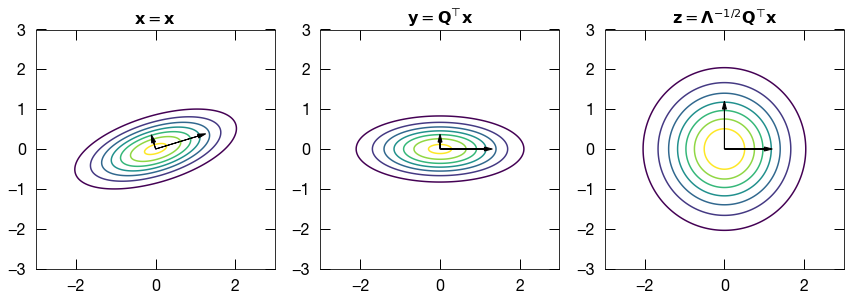

In [7]:
# Plot Random Gaussian, Deccorelation Transformation, and Whitening Transformation 
from scipy import random

n = 2
A = random.rand(n,n)
cov_x = np.dot(A,A.transpose())#+np.eye(n)

w,v = np.linalg.eig(cov_x)
cov_y = np.diag(w)
cov_z = np.eye(2)

f, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(12,4))
for ax,cov in zip([ax1,ax2,ax3],[cov_x,cov_y,cov_z]):
    plot_normal_and_eigvecs(ax,cov,3,0.1)
      
ax1.set_title(r'$\mathbf{x} = \mathbf{x}$')    
ax2.set_title(r'$\mathbf{y} = \mathbf{Q}^{\top}\mathbf{x}$')
ax3.set_title(r'$\mathbf{z} = \mathbf{\Lambda}^{-1/2}\mathbf{Q}^{\top}\mathbf{x}$')

plt.tight_layout()
plt.show()

Each component of $\mathbf{z}$ now behaves like a unit normal variable. Taking the sqaured norm gives a new random variable: 

$$ x = r^2 = \mathbf{z}^{\top}\mathbf{z} = \sum_i z_i z_i $$

$x$ belongs to a distribution known as the [chi-squared distribution](https://en.wikipedia.org/wiki/Chi-squared_distribution), $\chi^{2}_{k}$, with 3 degrees of freedom, $\chi^{2}_{3}$. Also note that here $r$ can be considered the radius of a sphere in $\mathbb{R}^k$ where $k$ is the dimension of $\mathbf{z}$. 

After this we can just use the definitions for the probability density function for the $\chi^{2}_{k}$ distribution which we will call $f(x,k)$. Then the amount of probability density enclosed by a value $x = c$ is equal to the cumulative density function (CDF):

$$ \text{CDF} = \int_{0}^{c} f(x,k)dx $$ 

Fortunately, we don't need to attempt to calculate this integral, because the results are tabulated in readily available tables. For instance, Wikipedia supplies $p$ values corresponding to different values of $c$ for the different distributions $\chi^{2}_{k}$. The $p$ value is the integrated probability density greater than $c$, i.e.:

$$ p\text{-value} = \int_{c}^{\infty} f(x,k)dx $$

Hence,

$$ \text{CDF} = 1-p $$.

Now to find the value of $x$ that encloses $95\%$ of the probability density, we find look up $p = 1-0.95 = 0.05$ in the table for whatever dimension $\chi^{2}_{k}$ distribution we're interested in, say $k=3$, and find that for $p=0.05$, $c=7.81$, i.e.:

$$ 0.95 = \int_{0}^{7.81} f(x,3)dx $$ 

So now we've found $c$! Since it encloses $95\%$ probability density of $\chi^{2}$, and $x = \mathbf{z}^{\top}\mathbf{z}$, we now know the equation of the ellipsoid that encloses $95\%$ of the probability distribution of $\mathbf{x}$, i.e.:

$$ 7.81 = \mathbf{x}^{\top}\mathbf{\Sigma}^{-1}\mathbf{x} $$


This gives the equation of the thermal ellipsoids for the atoms pictured in the top of the page! Each atom has its own covariance matrix $\mathbf{\Sigma}$, and then the ellipsoid is plotted using the procedure outlined above.


## Conclusions

The energy landscape of atomic motion in the solid state can be approximated by a parabolic curve known as the harmonic approximation which gives rise to a Gaussian probability distribution. If a researcher can obtain an appropriate estimate of the covariance matrix $\mathbf{\Sigma}$ then all of the parameters of the atomic distribution are known. 

To visualize the effect of a particular covariance matrix it is useful to plot constant-probability contours. Through linear transformations we showed the connection between normal random variables and the $\chi^2$ distribution. Then by finding the value of a $\chi^{2}$ distributed variable that encloses $95\%$ of the probability density, we were able to find the constant $c$, in $c=\mathbf{x}^{\top}\mathbf{\Sigma}^{-1}\mathbf{x}$, that defines the equation of an ellipsoid which contains $95\%$ of the probability distribution of $\mathbf{x}$.


Thanks for reading!